In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [10]:
# K = int(input('The total number of arms is: '))
# T = int(input('The total number of pulls: '))
def Stochastic(K,T):
  np.random.seed(69)

  mean_table=np.random.uniform(0, 1, size=K)
  # print(mean_table)

  reward_table = np.zeros((K, T))
  #no. of rows = K
  #no. of columns = T

  for i in range(K):
      for j in range(T):
          reward_table[i, j] = np.random.normal(loc = mean_table[i], scale = 0.01)

  print(mean_table)
  # print(reward_table)
  return reward_table,mean_table

In [11]:
def Adversarial(K,T):
  np.random.seed(69)

  # mean_table=np.zeros(K)

  # for i in range(K):
  #     mean_table[i]=random.uniform(0, 1)

  reward_table = np.zeros((K, T))
  #no. of rows = K
  #no. of columns = T5

  for i in range(K):
      for j in range(T):
          reward_table[i, j] = np.random.uniform(0,i/K)
  # i = bandit number

  mean_table = []
  for i in range(K):
      mean_table.append(np.mean(reward_table[i]))

  print(mean_table)
  # print(reward_table)
  return reward_table,mean_table

## **EXP3:**

In [14]:
def Exp3(K,T,mean_table,reward_table):
  # Generate a random value for gamma in the range [0, 1]
  # gam = np.random.uniform(0, 1)
  gam = 0.5

  pseudo_regret_list = []
  obser_regret_list = []
  horizon = np.arange(100, 1000, 10)

  for T in horizon:
      weights = [1.0] * K  # Initialize weights for each arm
      pseudo_regret = 0
      regret = 0
      best_exp_reward = np.max(mean_table)  # Find the best possible reward from the mean_table
      
      for t in range(T):
          best_obs_reward = np.max(reward_table[:,t])
          total_weight = sum(weights)
          probabilities = [(1 - gam) * weight / total_weight + gam / K for weight in weights]  # Calculate the probabilities of choosing each arm
          
          arm = np.random.choice(range(K), p=probabilities)  # Choose an arm based on the probabilities
          reward = reward_table[arm, t]  # Get the reward for the chosen arm and timestep
          
          x_hat = [0] * K
          x_hat[arm] = reward / probabilities[arm]  # Estimate the reward based on the observed reward and chosen arm's probability
          
          for i in range(len(weights)):
              weights[i] = weights[i] * math.exp(gam * x_hat[i] / K)  # Update the weights based on the estimated reward
          
          pseudo_regret += (best_exp_reward - reward)  # Calculate the regret for the timestep
          regret += (best_obs_reward - reward)  # Calculate the regret for the timestep
      
      pseudo_regret_list.append(pseudo_regret)  # Append the total regret for the horizon
      obser_regret_list.append(regret)  # Append the total regret for the horizon

  # Plotting the regret as a function of the horizon
  plt.plot(horizon, pseudo_regret_list,label='Pseudo regret')
  plt.plot(horizon, obser_regret_list,label = 'Actual regret')
  plt.xlabel('Horizon')
  plt.ylabel('Regret')
  plt.title('Regret vs Horizon')
  plt.legend()
  plt.show()

The total number of arms is: 5
The total number of pulls: 1000
[0.29624916 0.80906772 0.35025253 0.78940926 0.56134898]


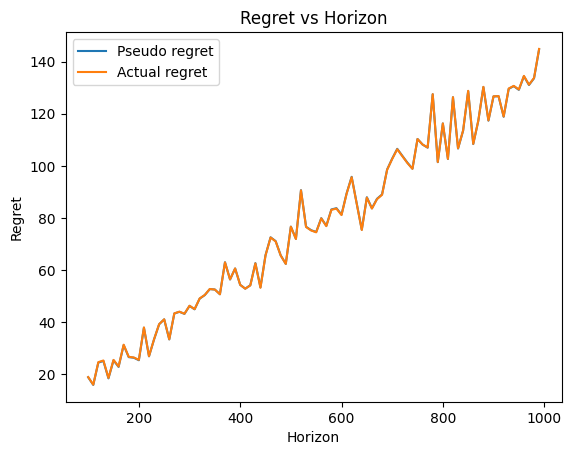

In [15]:
K = int(input('The total number of arms is: '))
T = int(input('The total number of pulls: '))
reward_table, mean_table = Stochastic(K,T)
Exp3(K,T,mean_table,reward_table)

The total number of arms is: 5
The total number of pulls: 1000
[0.0, 0.09916748856471268, 0.20261341619874237, 0.300400565758483, 0.3989257833482755]


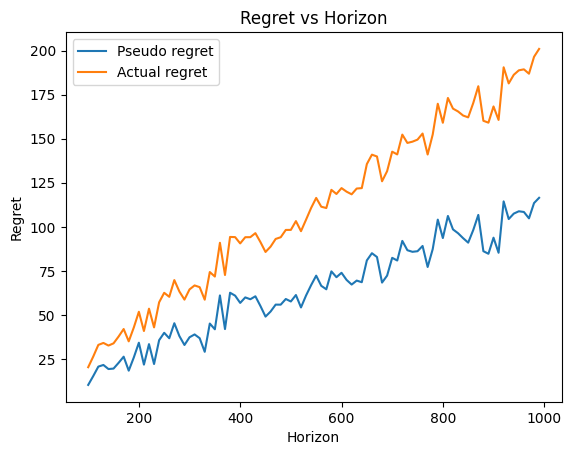

In [16]:
K = int(input('The total number of arms is: '))
T = int(input('The total number of pulls: '))
reward_table, mean_table = Adversarial(K,T)
Exp3(K,T,mean_table,reward_table)

# **UCB**

In [24]:
def UCB(K, T, mean_table, reward_table):

    pseudo_regret_list = []
    obser_regret_list = []
    times_pulled = np.zeros(K)
    total_pulls = 0
    regret = 0
    pseudo_regret = 0
    horizon = np.arange(100, 1000, 10)

    e=random.uniform(0, 1) # exploration parameter = e
    
    # if total_pulls<=T: #even this can be used
    for T in horizon:
      for j in range(T):
          ucb_values = mean_table + e*np.sqrt(np.log(times_pulled)/total_pulls)
          max_value_arm = np.argmax(ucb_values)
          reward = np.max(ucb_values)
          best_reward = max(reward_table[:, j])
          times_pulled[max_value_arm] += 1
          total_pulls += 1
          pseudo_regret += (best_reward - reward)
          regret += (best_reward - reward)
          mean_table[max_value_arm] = (mean_table[max_value_arm]*(total_pulls-1) + reward_table[max_value_arm, total_pulls-1])/total_pulls

          pseudo_regret_list.append(pseudo_regret)  # Append the total regret for the horizon
          obser_regret_list.append(regret)  # Append the total regret for the horizon

     # Plotting the regret as a function of the horizon
    plt.plot(horizon, pseudo_regret_list,label='Pseudo regret')
    plt.plot(horizon, obser_regret_list,label = 'Actual regret')
    plt.xlabel('Horizon')
    plt.ylabel('Regret')
    plt.title('Regret vs Horizon')
    plt.legend()
    plt.show()

In [25]:
K = int(input('The total number of arms is: '))
T = int(input('The total number of pulls: '))
reward_table, mean_table = Stochastic(K,T)
UCB(K,T,mean_table,reward_table)

The total number of arms is: 5
The total number of pulls: 1000
[0.29624916 0.80906772 0.35025253 0.78940926 0.56134898]


<ipython-input-24-1925be19b0bb>:16: RuntimeWarning: divide by zero encountered in log
  ucb_values = mean_table + e*np.sqrt(np.log(times_pulled)/total_pulls)
<ipython-input-24-1925be19b0bb>:16: RuntimeWarning: invalid value encountered in sqrt
  ucb_values = mean_table + e*np.sqrt(np.log(times_pulled)/total_pulls)


IndexError: ignored